In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pywt

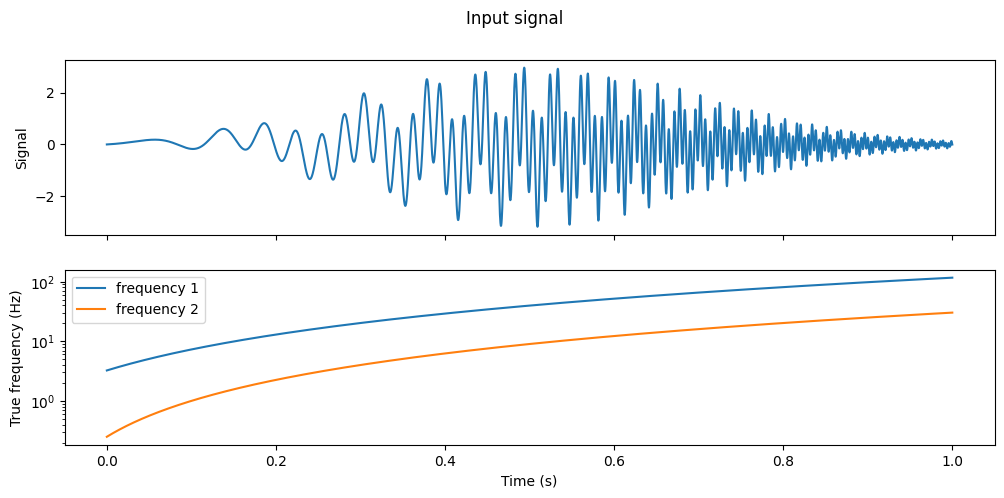

In [47]:
def gaussian(x, x0, sigma):
    return np.exp(-0.5 * ((x - x0) / sigma)**2) * 1/(sigma*np.sqrt(np.pi*2))

def chirp(t, t0, a):
    frequency = (a * (t + t0))**2 # In Hz
    chirp = np.sin(2*np.pi*frequency*t)
    return chirp, frequency

# generate signal
ti, tf, dt = 0, 1, 1e-4
t = np.arange(ti, tf, dt)

c1, f1 = chirp(t, 0.2, 9)
c2, f2 = chirp(t, 0.1, 5)
c3, f3 = chirp(t, 1, 1)

signal = (c1 + 0.6*c2) * gaussian(t, 0.5, 0.2)

# plot signal
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12,5))
axs[0].plot(t, signal)
axs[0].set_ylabel("Signal")
axs[1].plot(t, f1, label="frequency 1")
axs[1].plot(t, f2, label="frequency 2")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("True frequency (Hz)")
axs[1].set_yscale('log')
axs[1].legend()
plt.suptitle("Input signal")
plt.show()

In [44]:
# perform CWT
wavelet = "cmor1.5-1.0"

sampling_period = dt
frequencies = np.geomspace(1, 1e3, num=500)*dt
scale       = pywt.frequency2scale(wavelet, frequencies)

cwtmatr, freqs  = pywt.cwt(signal, scale, wavelet, sampling_period=sampling_period)
coefficients    = np.abs(cwtmatr[:-1, :-1])

fft             = np.fft.rfft(signal)
fft_frquencies  = np.fft.rfftfreq(len(signal), sampling_period)

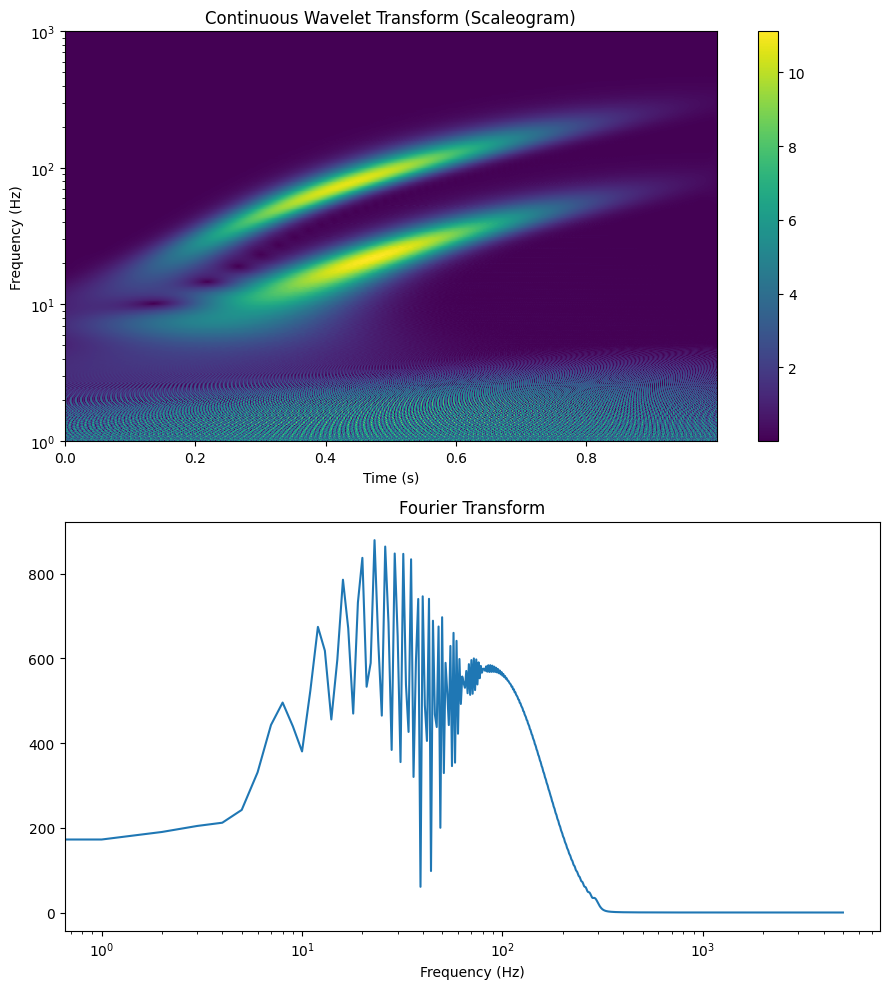

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(9, 10))
pcm = axs[0].pcolormesh(t, freqs, coefficients)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
axs[0].set_yscale("log")
fig.colorbar(pcm, ax=axs[0])


plt.semilogx(fft_frquencies, np.abs(fft))
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_title("Fourier Transform")
plt.tight_layout()